 # This Notebook is used for Exploratory Data Analysis and Data Preprocessing/Cleaning of the Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv',index_col=False)    # Load the train dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv('test.csv',index_col=False)   # Load the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for null values

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Exploratory Data Analysis

Countplot for Sex


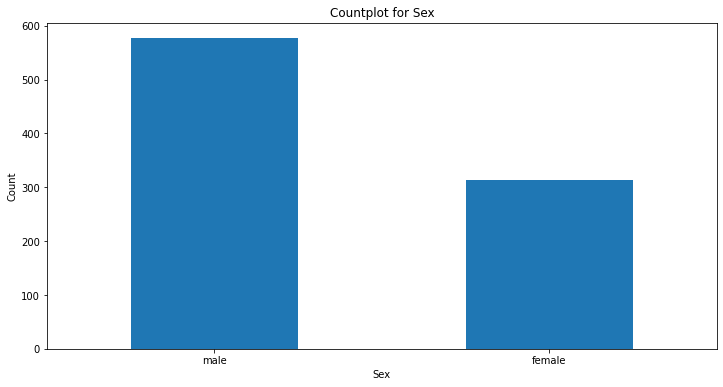

In [ ]:
plt.figure(figsize = (12,6))
fig = train_df['Sex'].value_counts().plot(kind = "bar")
plt.title("Countplot for Sex")
plt.xticks(rotation = 0)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show(fig)

Countplot for Age

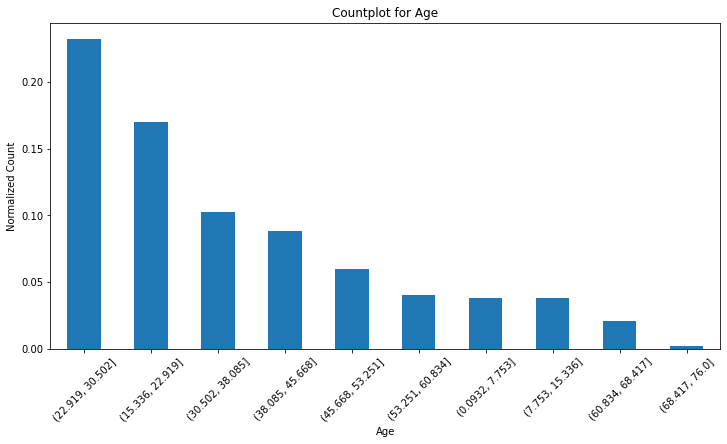

In [ ]:
plt.figure(figsize = (12,6))
fig = test_df['Age'].value_counts(normalize = True , bins = 10).plot(kind = "bar")
plt.title("Countplot for Age")
plt.xticks(rotation = 45)
plt.xlabel("Age")
plt.ylabel("Normalized Count")
plt.show(fig)

Countplot for SibSp

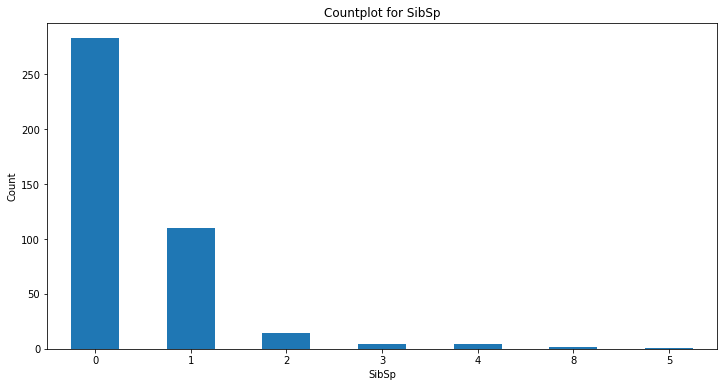

In [ ]:
plt.figure(figsize = (12,6))
fig = test_df['SibSp'].value_counts().plot(kind = "bar")
plt.title("Countplot for SibSp")
plt.xticks(rotation = 0)
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.show(fig)

Countplot for Embarked

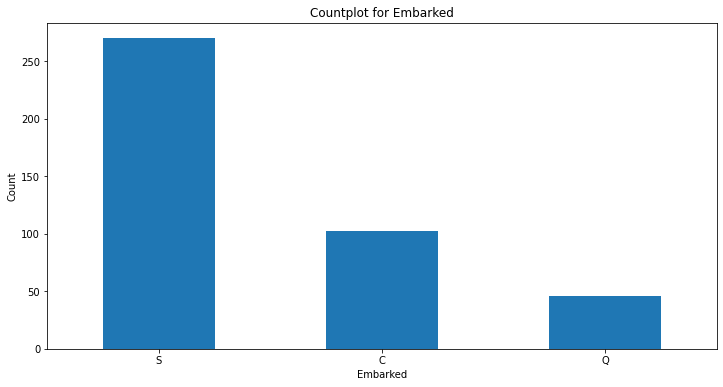

In [ ]:
plt.figure(figsize = (12,6))
fig = test_df['Embarked'].value_counts().plot(kind = "bar")
plt.title("Countplot for Embarked")
plt.xticks(rotation = 0)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show(fig)

Countplot for Fare

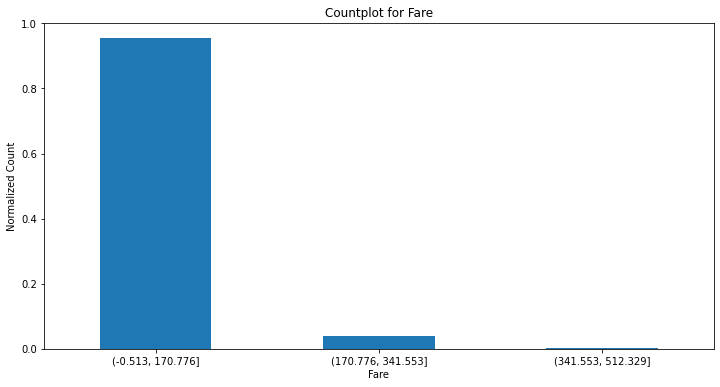

In [ ]:
plt.figure(figsize = (12,6))
fig = test_df['Fare'].value_counts(normalize = True , bins = 3).plot(kind = "bar")
plt.title("Countplot for Fare")
plt.xticks(rotation = 0)
plt.xlabel("Fare")
plt.ylabel("Normalized Count")
plt.show(fig)

Boxplot for Fare

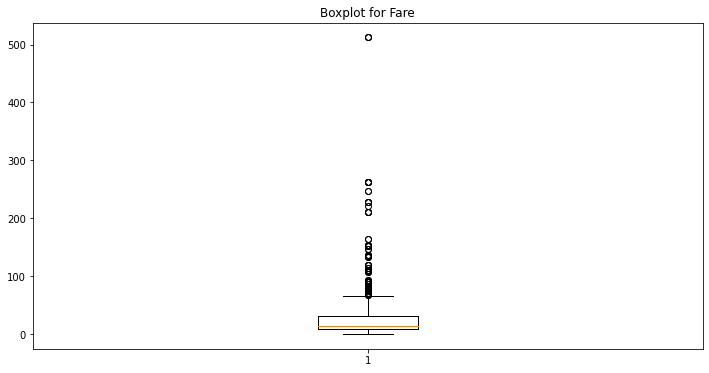

In [ ]:
data =  train_df['Fare'] 
fig = plt.figure(figsize =(12, 6))
plt.boxplot(data) 
plt.title("Boxplot for Fare")
plt.show()


Survived vs Sex 

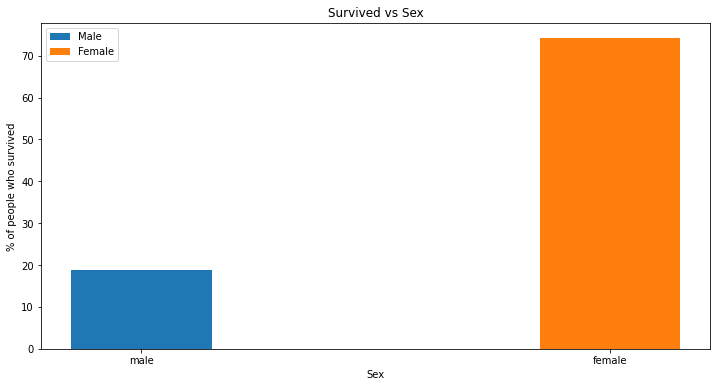

In [ ]:
df1 = train_df[train_df["Sex"] == "male"]     # Splitting the dataframe
df2 = train_df[train_df["Sex"] == "female"]   # Splitting the dataframe

plt.figure(figsize = (12,6))

plt.bar(df1["Sex"] , (np.sum(df1["Survived"])/len(df1))*100 , label = "Male" , width = 0.3)    
plt.bar(df2["Sex"] , (np.sum(df2["Survived"])/len(df2))*100 , label = "Female" , width = 0.3)  

plt.title("Survived vs Sex")
plt.xlabel("Sex")
plt.ylabel("% of people who survived")

plt.legend()

plt.show()

### Adding a new feature Gender_Name  (checking if courtesy titles like Mr/Mrs/Master/Miss/Dr affect chances of survival)

In [ ]:
train_df["Gender_Name"] = np.nan

In [ ]:
gender_words = ["mr" , "mrs" , "dr" , "master" , "miss"]

for index , row in train_df.iterrows() :
  name = row["Name"].split()
  
  for word in name :    
    word = word.strip().lower().replace(".","") 

    if word in gender_words :
      train_df.loc[index , "Gender_Name"] = gender_words.index(word) + 1      
    #else:
      #counter += 0
      #train_df.loc[index , "Gender_Name"] = 0

train_df['Gender_Name'].mask(train_df['Gender_Name'].isnull() == True, 0, inplace=True)


In [ ]:
gender_words = ["mr" , "mrs" , "dr" , "master" , "miss"]

for index , row in test_df.iterrows() :
  name = row["Name"].split()
  
  for word in name :    
    word = word.strip().lower().replace(".","") 

    if word in gender_words :
      test_df.loc[index , "Gender_Name"] = gender_words.index(word) + 1      
    #else:
      #counter += 0
      #train_df.loc[index , "Gender_Name"] = 0

test_df['Gender_Name'].mask(test_df['Gender_Name'].isnull() == True, 0, inplace=True)

In [ ]:
train_df["Gender_Name"].value_counts()

1.0    517
5.0    182
2.0    125
4.0     40
0.0     20
3.0      7
Name: Gender_Name, dtype: int64

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


### Plotting a Gender_Name vs Survived graph  

In [ ]:
heights = []

for i in range(0,6) :
  train_df_copy = train_df.loc[train_df['Gender_Name'] == i]
  heights.append(round(np.mean(train_df_copy["Survived"]),2))

print(heights)

[0.45, 0.16, 0.79, 0.43, 0.57, 0.7]


In [ ]:
x_df = [int(x) for x in train_df["Gender_Name"].unique()]
x_df.sort()


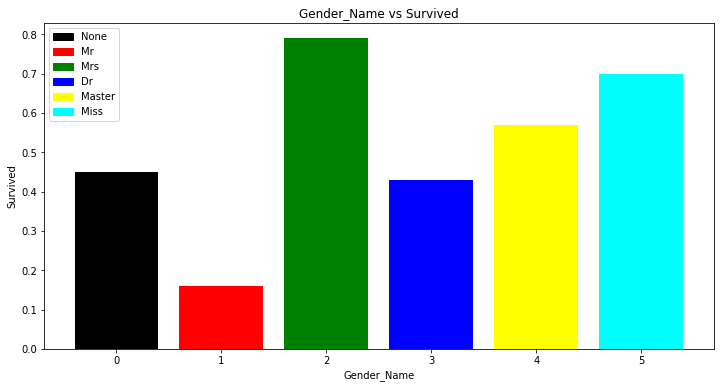

In [ ]:
colors = {"None" : 'black',"Mr"  : 'red' ,"Mrs" : 'green' , "Dr" : 'blue' , "Master" : 'yellow' , "Miss" : 'cyan'}

labels = list(colors.keys())


plt.figure(figsize=(12,6))
plt.bar(x_df , heights , label = labels , color=['black', 'red', 'green', 'blue', 'yellow' , 'cyan'])
plt.title("Gender_Name vs Survived")
plt.xlabel("Gender_Name")
plt.ylabel("Survived")


handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

### Inference :  Courtesy titles affect the chances of survival

## Feature Engineering

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


### Dropping unwanted columns

In [ ]:
train_df.drop(["Name" , "PassengerId" , "Ticket" , "Cabin"] , axis = 1 , inplace = True)
test_df.drop(["Name" , "PassengerId" , "Ticket" , "Cabin"] , axis = 1 , inplace = True)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender_Name
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,5.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


### Handling missing values in Age column

In [ ]:
train_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Gender_Name      0
dtype: int64

In [ ]:
test_df.isnull().sum()

Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Gender_Name     0
dtype: int64

In [ ]:
train_age_mean = np.mean(train_df['Age'])
train_df['Age'].mask(train_df['Age'].isnull() == True, train_age_mean, inplace=True)
train_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Gender_Name    0
dtype: int64

In [ ]:
test_age_mean = np.mean(test_df['Age'])
test_df['Age'].mask(test_df['Age'].isnull() == True, test_age_mean, inplace=True)
test_df.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Gender_Name    0
dtype: int64

### Handling missing values in Embarked

In [ ]:
train_df = train_df[train_df['Embarked'].notna()]
test_df = test_df[test_df['Fare'].notna()]

In [ ]:
train_df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Gender_Name    0
dtype: int64

In [ ]:
test_df.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Gender_Name    0
dtype: int64

### One Hot Encoding Sex and Embarked columns

In [ ]:
sex_dummy_train = pd.DataFrame(pd.get_dummies(train_df["Sex"] , drop_first = True ))
sex_dummy_train.value_counts()


male
1       577
0       312
dtype: int64

In [ ]:
train_df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [ ]:
sex_dummy_test = pd.DataFrame(pd.get_dummies(test_df["Sex"] , drop_first = True ))
sex_dummy_test.value_counts()

male
1       265
0       152
dtype: int64

In [ ]:
test_df["Sex"].value_counts()

male      265
female    152
Name: Sex, dtype: int64

In [ ]:
embarked_dummy_train = pd.DataFrame(pd.get_dummies(train_df["Embarked"] , drop_first = True , prefix = "Embarked" ))
embarked_dummy_train.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
embarked_dummy_test = pd.DataFrame(pd.get_dummies(test_df["Embarked"] , drop_first = True , prefix = "Embarked" ))
embarked_dummy_test.head()

,Embarked_Q,Embarked_S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
train_df = pd.concat([train_df.drop(["Sex" , "Embarked"] , axis = 1) , sex_dummy_train , embarked_dummy_train] , axis = 1)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_Name,male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,1,0,1
1,1,1,38.0,1,0,71.2833,2.0,0,0,0
2,1,3,26.0,0,0,7.9250,5.0,0,0,1
3,1,1,35.0,1,0,53.1000,2.0,0,0,1
4,0,3,35.0,0,0,8.0500,1.0,1,0,1


In [ ]:
test_df = pd.concat([test_df.drop(["Sex" , "Embarked"] , axis = 1) , sex_dummy_test , embarked_dummy_test] , axis = 1)
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_Name,male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1,1,0
1,3,47.0,1,0,7.0000,2.0,0,0,1
2,2,62.0,0,0,9.6875,1.0,1,1,0
3,3,27.0,0,0,8.6625,1.0,1,0,1
4,3,22.0,1,1,12.2875,2.0,0,0,1


### Scaling numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(train_df["Age"]).reshape(-1,1))
train_scaled = pd.DataFrame(scaler.transform(np.array(train_df["Age"]).reshape(-1,1)),columns = ["Age"])
test_scaled = pd.DataFrame(scaler.transform(np.array(test_df["Age"]).reshape(-1,1)),columns = ["Age"])


In [ ]:
train_scaled.head()

,Age
0,-0.590495
1,0.643971
2,-0.281878
3,0.412509
4,0.412509


In [ ]:
test_scaled.head()

,Age
0,0.373932
1,1.338358
2,2.495670
3,-0.204724
4,-0.590495


In [ ]:
train_df = pd.concat([train_df.drop(["Age"],axis = 1) , train_scaled] , axis = 1)
test_df = pd.concat([test_df.drop(["Age"],axis = 1) , test_scaled] , axis = 1)

In [ ]:
train_df.drop(["Fare"] , axis = 1 , inplace = True)
test_df.drop(["Fare"] , axis = 1 , inplace = True)

### Saving the preprocessed dataframes into csv files

In [ ]:
train_df.to_csv('cleaned_train.csv' , index = False)
test_df.to_csv('cleaned_test.csv' , index = False)